# DATA 601 Final Project

Name of the dataset: California SAT score reports<br>
Data Source Location: https://data.world/data<br>
Description of how data source was found: I have searched in data world with the key term SAT scores, then I found the above data set which have met the requirements of the rubric.<br>
Cost incurred to download the dataset: Zero, the dataset is free to download.<br>
Legality of the data set: The data set is from a free source and can be accessible by everyone and the data is legal to use.<br>
Documented Exploratory Data Analysis: I have searched a lot on google but did not find any previously documented EDA on the datasets.<br>
Data types in the dataset: Numeric: Int, Categorical; Datetime<br>
Project proposal relevant to 601 objectives: The project that I have selected is relevant to the objective of data601<br>
Description (Stories in the Data):  The project is regarding multiple datasets which contains California SAT scores from 1998 to 2016. I am aiming to combine the datasets from 2010 to 2016 and their number of rows are 2431, 2473, 2595, 2293, 2332 and 2335 rows. The common columns the datasets contained are County number, District number, School number, School name, grade 12th marks, mean score, average score in math and verbal.<br>
Data size: The combined dataset occupied is 3-4MB. The data combined won’t have more than 12600 rows and the common columns are 7 in number.
#### Hypothesis:
1.	I am assuming that the mean score has increased by atleast 10 percent for every years. 
2.	I am also assuming that the number of takers are increasing by 15 percent. 

#### Questions to be answered:
1.	Which county presented the largest change in the increase of takers?
2.	Which county presented the largest change in mean scores and are they same?




#### Primary Observation: 
From the first look, the six datasets have various empty values in particular columns Verbal Mean, Math mean and Writing mean. Many of the records of the dataset, the schools have students who have passed Grade 12 but have not taken the SAT Test. 

### Importing Required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [ ]:
pip install cufflinks plotly

In [ ]:
dataset1=pd.read_excel("https://query.data.world/s/i4clrkop6iltjvlglujefknlm6gtsi",skiprows=3)
dataset2=pd.read_excel("https://query.data.world/s/g7tradpx6r32zg3yoiztjilacpco7w",skiprows=3)
dataset3=pd.read_excel('https://query.data.world/s/bgk2zmqwuxsfpa7xczawkbpth42g62',skiprows=3)
dataset4=pd.read_excel('https://query.data.world/s/i5wpkcdei474jud3ychktwr7oi3obj')
dataset5=pd.read_excel('https://query.data.world/s/smza7nh725mb4orq57kezlu7wqqjlm')
dataset6=pd.read_excel('http://www3.cde.ca.gov/researchfiles/satactap/sat16.xls',sheet_name='SAT_2016')

In [ ]:
dataset1.head()

,County\nNumber,District\nNumber,School\nNumber,County Name,District Name,School Name,Grade\n12,Number\nTested,Percent\nTested,V_Mean,M_Mean,W_Mean,Tot_Mean,GE1500Ct,Rate1500
0,1,10017,109835,Alameda,Alameda County Office of Educa,FAME Public Charter,64,18.0,28.13,530.0,529.0,526.0,1585.0,12.0,66.67
1,1,10017,112607,Alameda,Alameda County Office of Educa,Envision Academy for Arts & Technology,38,35.0,92.11,381.0,372.0,381.0,1134.0,2.0,5.71
2,1,10017,118489,Alameda,Alameda County Office of Educa,Aspire California College Preparatory Ac,20,NaN,.,NaN,NaN,NaN,NaN,NaN,NaN
3,1,10017,130401,Alameda,Alameda County Office of Educa,Alameda County Juvenile Hall/Court,131,NaN,.,NaN,NaN,NaN,NaN,NaN,NaN
4,1,10017,130419,Alameda,Alameda County Office of Educa,Alameda County Community,25,NaN,.,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset1.columns=['County_Number','District_Number','School_Number','County_Name','District_Name','School_Name','Grade_12','Number_Tested','Percent_Tested','Verbal_Mean','Math_Mean','Writing_Mean','Total_Mean','Num_Greater_1500','Percent_Greater_1500']

In [ ]:
dataset1.dtypes

County_Number             int64
District_Number           int64
School_Number             int64
County_Name              object
District_Name            object
School_Name              object
Grade_12                  int64
Number_Tested           float64
Percent_Tested           object
Verbal_Mean             float64
Math_Mean               float64
Writing_Mean            float64
Total_Mean              float64
Num_Greater_1500        float64
Percent_Greater_1500    float64
dtype: object

In [ ]:
dataset1['County_Number']=dataset1['County_Number'].astype(str)
dataset1['District_Number']=dataset1['District_Number'].astype(str)
dataset1['School_Number']=dataset1['School_Number'].astype(str)

The columns County Number, District Number, School Number are combined to one column to have a unique ID called CDS.<br> Additionally, the columns County Number, District Number, School Number are dropped as they have no use now.<br>The year column is added to separate every dataset

In [ ]:
dataset1 = dataset1.assign(CDS=dataset1.County_Number+dataset1.District_Number+dataset1.School_Number)

In [ ]:
dataset1=dataset1.drop(["County_Number","District_Number","School_Number"],axis=1)
dataset1=dataset1[['CDS','County_Name','District_Name','School_Name','Grade_12','Number_Tested','Percent_Tested','Verbal_Mean','Math_Mean','Writing_Mean','Total_Mean','Num_Greater_1500','Percent_Greater_1500']]
dataset1=dataset1.drop(["Percent_Tested","Percent_Greater_1500"],axis=1)
dataset1['year']=2010
dataset1.head()

,CDS,County_Name,District_Name,School_Name,Grade_12,Number_Tested,Verbal_Mean,Math_Mean,Writing_Mean,Total_Mean,Num_Greater_1500,year
0,110017109835,Alameda,Alameda County Office of Educa,FAME Public Charter,64,18.0,530.0,529.0,526.0,1585.0,12.0,2010
1,110017112607,Alameda,Alameda County Office of Educa,Envision Academy for Arts & Technology,38,35.0,381.0,372.0,381.0,1134.0,2.0,2010
2,110017118489,Alameda,Alameda County Office of Educa,Aspire California College Preparatory Ac,20,NaN,NaN,NaN,NaN,NaN,NaN,2010
3,110017130401,Alameda,Alameda County Office of Educa,Alameda County Juvenile Hall/Court,131,NaN,NaN,NaN,NaN,NaN,NaN,2010
4,110017130419,Alameda,Alameda County Office of Educa,Alameda County Community,25,NaN,NaN,NaN,NaN,NaN,NaN,2010


In [ ]:
dataset1.isna().sum()

CDS                    0
County_Name            0
District_Name          0
School_Name            0
Grade_12               0
Number_Tested        962
Verbal_Mean         1282
Math_Mean           1282
Writing_Mean        1282
Total_Mean          1282
Num_Greater_1500    1282
year                   0
dtype: int64

In [ ]:
dataset1=dataset1.fillna(0)

In [ ]:
dataset1['Verbal_Mean']=dataset1['Verbal_Mean'].astype('int64')
dataset1['Math_Mean']=dataset1['Math_Mean'].astype('int64')
dataset1['Writing_Mean']=dataset1['Writing_Mean'].astype('int64')
dataset1['Total_Mean']=dataset1['Total_Mean'].astype('int64')

In [ ]:
dataset1.head()

,CDS,County_Name,District_Name,School_Name,Grade_12,Number_Tested,Verbal_Mean,Math_Mean,Writing_Mean,Total_Mean,Num_Greater_1500,year
0,110017109835,Alameda,Alameda County Office of Educa,FAME Public Charter,64,18.0,530,529,526,1585,12.0,2010
1,110017112607,Alameda,Alameda County Office of Educa,Envision Academy for Arts & Technology,38,35.0,381,372,381,1134,2.0,2010
2,110017118489,Alameda,Alameda County Office of Educa,Aspire California College Preparatory Ac,20,0.0,0,0,0,0,0.0,2010
3,110017130401,Alameda,Alameda County Office of Educa,Alameda County Juvenile Hall/Court,131,0.0,0,0,0,0,0.0,2010
4,110017130419,Alameda,Alameda County Office of Educa,Alameda County Community,25,0.0,0,0,0,0,0.0,2010


In [ ]:
dataset2.head()

,County\nNumber,District\nNumber,School\nNumber,County Name,District Name,School Name,Grade\n12,Number\nTested,Percent\nTested,V_Mean,M_Mean,W_Mean,Tot_Mean,GE1500Ct,Rate1500
0,1,10017,109835,Alameda,Alameda County Office of Education,FAME Public Charter,67,26.0,38.81,498.0,505.0,519.0,1523.0,12.0,46.15
1,1,10017,112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,59,47.0,79.66,368.0,381.0,383.0,1132.0,3.0,6.38
2,1,10017,118489,Alameda,Alameda County Office of Education,Aspire California College Preparatory Academy,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,10017,130401,Alameda,Alameda County Office of Education,Alameda County Juvenile Hall/Court,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,10017,130419,Alameda,Alameda County Office of Education,Alameda County Community,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset2.columns=['County_Number','District_Number','School_Number','County_Name','District_Name','School_Name','Grade_12','Number_Tested','Percent_Tested','Verbal_Mean','Math_Mean','Writing_Mean','Total_Mean','Num_Greater_1500','Percent_Greater_1500']

In [ ]:
dataset2.dtypes

County_Number             int64
District_Number           int64
School_Number             int64
County_Name              object
District_Name            object
School_Name              object
Grade_12                  int64
Number_Tested           float64
Percent_Tested          float64
Verbal_Mean             float64
Math_Mean               float64
Writing_Mean            float64
Total_Mean              float64
Num_Greater_1500        float64
Percent_Greater_1500    float64
dtype: object

In [ ]:
dataset2['County_Number']=dataset2['County_Number'].astype(str)
dataset2['District_Number']=dataset2['District_Number'].astype(str)
dataset2['School_Number']=dataset2['School_Number'].astype(str)
dataset2 = dataset2.assign(CDS=dataset2.County_Number+dataset2.District_Number+dataset2.School_Number)
dataset2=dataset2.drop(["County_Number","District_Number","School_Number"],axis=1)


In [ ]:
dataset2=dataset2[['CDS','County_Name','District_Name','School_Name','Grade_12','Number_Tested','Percent_Tested','Verbal_Mean','Math_Mean','Writing_Mean','Total_Mean','Num_Greater_1500','Percent_Greater_1500']]
dataset2=dataset2.drop(["Percent_Tested","Percent_Greater_1500"],axis=1)
dataset2['year']=2011
dataset2.head()

,CDS,County_Name,District_Name,School_Name,Grade_12,Number_Tested,Verbal_Mean,Math_Mean,Writing_Mean,Total_Mean,Num_Greater_1500,year
0,110017109835,Alameda,Alameda County Office of Education,FAME Public Charter,67,26.0,498.0,505.0,519.0,1523.0,12.0,2011
1,110017112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,59,47.0,368.0,381.0,383.0,1132.0,3.0,2011
2,110017118489,Alameda,Alameda County Office of Education,Aspire California College Preparatory Academy,44,NaN,NaN,NaN,NaN,NaN,NaN,2011
3,110017130401,Alameda,Alameda County Office of Education,Alameda County Juvenile Hall/Court,66,NaN,NaN,NaN,NaN,NaN,NaN,2011
4,110017130419,Alameda,Alameda County Office of Education,Alameda County Community,24,NaN,NaN,NaN,NaN,NaN,NaN,2011


In [ ]:
dataset2.isna().sum()

CDS                    0
County_Name            0
District_Name          0
School_Name            0
Grade_12               0
Number_Tested        975
Verbal_Mean         1285
Math_Mean           1285
Writing_Mean        1285
Total_Mean          1285
Num_Greater_1500    1285
year                   0
dtype: int64

In [ ]:
dataset2=dataset2.fillna(0)
dataset2['Verbal_Mean']=dataset2['Verbal_Mean'].astype('int64')
dataset2['Math_Mean']=dataset2['Math_Mean'].astype('int64')
dataset2['Writing_Mean']=dataset2['Writing_Mean'].astype('int64')
dataset2['Total_Mean']=dataset2['Total_Mean'].astype('int64')

In [ ]:
dataset2.head()

,CDS,County_Name,District_Name,School_Name,Grade_12,Number_Tested,Verbal_Mean,Math_Mean,Writing_Mean,Total_Mean,Num_Greater_1500,year
0,110017109835,Alameda,Alameda County Office of Education,FAME Public Charter,67,26.0,498,505,519,1523,12.0,2011
1,110017112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,59,47.0,368,381,383,1132,3.0,2011
2,110017118489,Alameda,Alameda County Office of Education,Aspire California College Preparatory Academy,44,0.0,0,0,0,0,0.0,2011
3,110017130401,Alameda,Alameda County Office of Education,Alameda County Juvenile Hall/Court,66,0.0,0,0,0,0,0.0,2011
4,110017130419,Alameda,Alameda County Office of Education,Alameda County Community,24,0.0,0,0,0,0,0.0,2011


In [ ]:
dataset3.head()

,County\nNumber,District\nNumber,School\nNumber,County Name,District Name,School Name,Grade\n12,Number\nTested,Percent\nTested,V_Mean,M_Mean,W_Mean,Tot_Mean,GE1500Ct,Rate1500
0,1,110017,109835,Alameda,Alameda County Office of Educa,FAME Public Charter,75,27.0,36.00,501.0,467.0,526.0,1494.0,12.0,44.44
1,1,110017,112607,Alameda,Alameda County Office of Educa,Envision Academy for Arts & Te,59,50.0,84.75,392.0,388.0,397.0,1178.0,6.0,12.00
2,1,110017,118489,Alameda,Alameda County Office of Educa,Aspire California College Preparato,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,110017,130401,Alameda,Alameda County Office of Education,Alameda County Juvenile Hall/Court,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,110017,130419,Alameda,Alameda County Office of Educa,Alameda County Community,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset3.columns=['County_Number','District_Number','School_Number','County_Name','District_Name','School_Name','Grade_12','Number_Tested','Percent_Tested','Verbal_Mean','Math_Mean','Writing_Mean','Total_Mean','Num_Greater_1500','Percent_Greater_1500']
dataset3['County_Number']=dataset3['County_Number'].astype(str)
dataset3['District_Number']=dataset3['District_Number'].astype(str)
dataset3['School_Number']=dataset3['School_Number'].astype(str)
dataset3 = dataset3.assign(CDS=dataset3.County_Number+dataset3.District_Number+dataset3.School_Number)
dataset3=dataset3.drop(["County_Number","District_Number","School_Number"],axis=1)
dataset3=dataset3[['CDS','County_Name','District_Name','School_Name','Grade_12','Number_Tested','Percent_Tested','Verbal_Mean','Math_Mean','Writing_Mean','Total_Mean','Num_Greater_1500','Percent_Greater_1500']]
dataset3=dataset3.drop(["Percent_Tested","Percent_Greater_1500"],axis=1)
dataset3['year']=2012
dataset3.head()

,CDS,County_Name,District_Name,School_Name,Grade_12,Number_Tested,Verbal_Mean,Math_Mean,Writing_Mean,Total_Mean,Num_Greater_1500,year
0,1110017109835,Alameda,Alameda County Office of Educa,FAME Public Charter,75,27.0,501.0,467.0,526.0,1494.0,12.0,2012
1,1110017112607,Alameda,Alameda County Office of Educa,Envision Academy for Arts & Te,59,50.0,392.0,388.0,397.0,1178.0,6.0,2012
2,1110017118489,Alameda,Alameda County Office of Educa,Aspire California College Preparato,53,NaN,NaN,NaN,NaN,NaN,NaN,2012
3,1110017130401,Alameda,Alameda County Office of Education,Alameda County Juvenile Hall/Court,67,NaN,NaN,NaN,NaN,NaN,NaN,2012
4,1110017130419,Alameda,Alameda County Office of Educa,Alameda County Community,34,NaN,NaN,NaN,NaN,NaN,NaN,2012


In [ ]:
dataset3.isna().sum()

CDS                    0
County_Name            0
District_Name          0
School_Name            0
Grade_12               0
Number_Tested       1052
Verbal_Mean         1366
Math_Mean           1366
Writing_Mean        1366
Total_Mean          1366
Num_Greater_1500    1366
year                   0
dtype: int64

In [ ]:
dataset3=dataset3.fillna(0)
dataset3['Verbal_Mean']=dataset3['Verbal_Mean'].astype('int64')
dataset3['Math_Mean']=dataset3['Math_Mean'].astype('int64')
dataset3['Writing_Mean']=dataset3['Writing_Mean'].astype('int64')
dataset3['Total_Mean']=dataset3['Total_Mean'].astype('int64')

In [ ]:
dataset3.head()

,CDS,County_Name,District_Name,School_Name,Grade_12,Number_Tested,Verbal_Mean,Math_Mean,Writing_Mean,Total_Mean,Num_Greater_1500,year
0,1110017109835,Alameda,Alameda County Office of Educa,FAME Public Charter,75,27.0,501,467,526,1494,12.0,2012
1,1110017112607,Alameda,Alameda County Office of Educa,Envision Academy for Arts & Te,59,50.0,392,388,397,1178,6.0,2012
2,1110017118489,Alameda,Alameda County Office of Educa,Aspire California College Preparato,53,0.0,0,0,0,0,0.0,2012
3,1110017130401,Alameda,Alameda County Office of Education,Alameda County Juvenile Hall/Court,67,0.0,0,0,0,0,0.0,2012
4,1110017130419,Alameda,Alameda County Office of Educa,Alameda County Community,34,0.0,0,0,0,0,0.0,2012


In [ ]:
dataset4.head()

,cds,rtype,sname,dname,cname,enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrite,NumGE1500,PctGE1500
0,0,X,NaN,NaN,NaN,498403,204848,492,506,489,93937,45.86
1,1000000000000,C,NaN,NaN,Alameda,16990,8625,521,543,523,4967,57.59
2,1100170000000,D,NaN,Alameda County Office of Educa,Alameda,222,53,424,429,427,11,20.75
3,1100170109835,S,FAME Public Charter,Alameda County Office of Educa,Alameda,47,12,553,523,534,8,66.67
4,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Educa,Alameda,48,41,387,402,396,3,7.32


This dataset follows a different format than the above dataframes.<br>Additionally, some rows are dropped when the columns District_Name and School_Name are blank and those rows had the sum of the number of takers and other columns.

In [ ]:
dataset4=dataset4.drop(["rtype"],axis=1)

In [ ]:
dataset4.dtypes

cds             int64
sname          object
dname          object
cname          object
enroll12        int64
NumTstTakr      int64
AvgScrRead     object
AvgScrMath     object
AvgScrWrite    object
NumGE1500      object
PctGE1500      object
dtype: object

In [ ]:
dataset4.columns=['CDS','School_Name','District_Name','County_Name','Grade_12','Number_Tested','Verbal_Mean','Math_Mean','Writing_Mean','Num_Greater_1500','Percent_Greater_1500']
dataset4=dataset4.drop(["Percent_Greater_1500"],axis=1)

In [ ]:
dataset4.isna().sum()

CDS                   0
School_Name         581
District_Name        58
County_Name           1
Grade_12              0
Number_Tested         0
Verbal_Mean         328
Math_Mean           328
Writing_Mean        328
Num_Greater_1500    328
dtype: int64

In [ ]:
dataset4=dataset4.dropna(subset=['District_Name','School_Name'])

In [ ]:
dataset4['year']=2013
dataset4=dataset4.replace('*',np.nan)
dataset4.head()

,CDS,School_Name,District_Name,County_Name,Grade_12,Number_Tested,Verbal_Mean,Math_Mean,Writing_Mean,Num_Greater_1500,year
3,1100170109835,FAME Public Charter,Alameda County Office of Educa,Alameda,47,12,553,523,534,8,2013
4,1100170112607,Envision Academy for Arts & Technology,Alameda County Office of Educa,Alameda,48,41,387,402,396,3,2013
5,1100170118489,Aspire California College Preparatory Ac,Alameda County Office of Educa,Alameda,51,0,NaN,NaN,NaN,NaN,2013
6,1316170131763,California School for the Deaf-Fremont,California School for the Deaf,Alameda,76,1,NaN,NaN,NaN,NaN,2013
8,1611190106401,Alameda Science and Technology Institute,Alameda Unified,Alameda,41,40,572,605,561,33,2013


In [ ]:
dataset4.isna().sum()

CDS                   0
School_Name           0
District_Name         0
County_Name           0
Grade_12              0
Number_Tested         0
Verbal_Mean         530
Math_Mean           530
Writing_Mean        530
Num_Greater_1500    530
year                  0
dtype: int64

This dataset doesnot have the column Total_Mean and this can be obtained by adding the column Verbal_Mean, Math_Mean and Writing_Mean and the some cells contained '-' which are filled with zero values

In [ ]:
dataset4=dataset4.fillna(0)
dataset4['Verbal_Mean']=dataset4['Verbal_Mean'].astype('int64')
dataset4['Math_Mean']=dataset4['Math_Mean'].astype('int64')
dataset4['Writing_Mean']=dataset4['Writing_Mean'].astype('int64')
dataset4['Total_Mean']=dataset4['Verbal_Mean']+dataset4['Math_Mean']+dataset4['Writing_Mean']
dataset4['Total_Mean']=dataset4['Total_Mean'].astype('int64')

In [ ]:
dataset4.head()

,CDS,School_Name,District_Name,County_Name,Grade_12,Number_Tested,Verbal_Mean,Math_Mean,Writing_Mean,Num_Greater_1500,year,Total_Mean
3,1100170109835,FAME Public Charter,Alameda County Office of Educa,Alameda,47,12,553,523,534,8,2013,1610
4,1100170112607,Envision Academy for Arts & Technology,Alameda County Office of Educa,Alameda,48,41,387,402,396,3,2013,1185
5,1100170118489,Aspire California College Preparatory Ac,Alameda County Office of Educa,Alameda,51,0,0,0,0,0,2013,0
6,1316170131763,California School for the Deaf-Fremont,California School for the Deaf,Alameda,76,1,0,0,0,0,2013,0
8,1611190106401,Alameda Science and Technology Institute,Alameda Unified,Alameda,41,40,572,605,561,33,2013,1738


In [ ]:
dataset5.head()

,cds,rtype,sname,dname,cname,enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrite,NumGE1500,PctGE1500
0,0,X,NaN,NaN,NaN,496901,210706,489,500,484,93334,44.30
1,1000000000000,C,NaN,NaN,Alameda,16978,8855,516,536,517,4900,55.34
2,1100170000000,D,NaN,Alameda County Office of Education,Alameda,398,88,418,418,417,14,15.91
3,1100170109835,S,FAME Public Charter,Alameda County Office of Education,Alameda,62,17,503,546,505,9,52.94
4,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,75,71,397,387,395,5,7.04


In [ ]:
dataset5=dataset5.drop(["rtype"],axis=1)

In [ ]:
dataset5.columns=['CDS','School_Name','District_Name','County_Name','Grade_12','Number_Tested','Verbal_Mean','Math_Mean','Writing_Mean','Num_Greater_1500','Percent_Greater_1500']
#dataset5=dataset5[['CDS','County_Name','District_Name','School_Name','Grade_12','Number_Tested','Verbal_Mean','Math_Mean','Writing_Mean','Num_Greater_1500','Percent_Greater_1500']]
dataset5=dataset5.dropna(subset=['District_Name','School_Name'])
dataset5=dataset5.drop(['Percent_Greater_1500'],axis=1)
dataset5['year']=2014
dataset5=dataset5.replace('*',np.nan)
dataset5.head()

,CDS,School_Name,District_Name,County_Name,Grade_12,Number_Tested,Verbal_Mean,Math_Mean,Writing_Mean,Num_Greater_1500,year
3,1100170109835,FAME Public Charter,Alameda County Office of Education,Alameda,62,17,503,546,505,9,2014
4,1100170112607,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,75,71,397,387,395,5,2014
5,1100170118489,Aspire California College Preparatory Academy,Alameda County Office of Education,Alameda,61,0,NaN,NaN,NaN,NaN,2014
7,1611190106401,Alameda Science and Technology Institute,Alameda Unified,Alameda,36,36,562,590,555,29,2014
8,1611190119222,Nea Community Learning Center,Alameda Unified,Alameda,12,6,NaN,NaN,NaN,NaN,2014


In [ ]:
dataset5.isna().sum()

CDS                   0
School_Name           0
District_Name         0
County_Name           0
Grade_12              0
Number_Tested         0
Verbal_Mean         499
Math_Mean           499
Writing_Mean        499
Num_Greater_1500    499
year                  0
dtype: int64

In [ ]:
dataset5=dataset5.fillna(0)
dataset5['Verbal_Mean']=dataset5['Verbal_Mean'].astype('int64')
dataset5['Math_Mean']=dataset5['Math_Mean'].astype('int64')
dataset5['Writing_Mean']=dataset5['Writing_Mean'].astype('int64')
dataset5['Total_Mean']=dataset5['Verbal_Mean']+dataset5['Math_Mean']+dataset5['Writing_Mean']
dataset5['Total_Mean']=dataset5['Total_Mean'].astype('int64')

In [ ]:
dataset5.head()

,CDS,School_Name,District_Name,County_Name,Grade_12,Number_Tested,Verbal_Mean,Math_Mean,Writing_Mean,Num_Greater_1500,year,Total_Mean
3,1100170109835,FAME Public Charter,Alameda County Office of Education,Alameda,62,17,503,546,505,9,2014,1554
4,1100170112607,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,75,71,397,387,395,5,2014,1179
5,1100170118489,Aspire California College Preparatory Academy,Alameda County Office of Education,Alameda,61,0,0,0,0,0,2014,0
7,1611190106401,Alameda Science and Technology Institute,Alameda Unified,Alameda,36,36,562,590,555,29,2014,1707
8,1611190119222,Nea Community Learning Center,Alameda Unified,Alameda,12,6,0,0,0,0,2014,0


In [ ]:
dataset6.head()

,cds,rtype,sname,dname,cname,enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrit,NumGE1500,PctGE1500,year
0,0,X,NaN,NaN,NaN,492835,214262,484,494,477,89840,41.93,1516
1,1000000000000,C,NaN,NaN,Alameda,16662,8611,517,534,515,4696,54.53,1516
2,1100170000000,D,NaN,Alameda County Office of Education,Alameda,263,95,395,378,388,6,6.32,1516
3,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,88,92,391,376,386,5,5.43,1516
4,1611190000000,D,NaN,Alameda Unified,Alameda,858,472,527,543,514,301,63.77,1516


In [ ]:
dataset6=dataset6.drop(["rtype","year"],axis=1)
dataset6.columns=['CDS','School_Name','District_Name','County_Name','Grade_12','Number_Tested','Verbal_Mean','Math_Mean','Writing_Mean','Num_Greater_1500','Percent_Greater_1500']
#dataset6=dataset6[['CDS','County_Name','District_Name','School_Name','Grade_12','Number_Tested','Verbal_Mean','Math_Mean','Writing_Mean','Num_Greater_1500','Percent_Greater_1500']]
dataset6=dataset6.dropna(subset=['District_Name','School_Name'])
dataset6['year']=2015
dataset6=dataset6.replace('*',np.nan)
dataset6=dataset6.drop(['Percent_Greater_1500'],axis=1)
dataset6.head()

,CDS,School_Name,District_Name,County_Name,Grade_12,Number_Tested,Verbal_Mean,Math_Mean,Writing_Mean,Num_Greater_1500,year
3,1100170112607,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,88,92,391,376,386,5,2015
5,1611190106401,Alameda Science and Technology Institute,Alameda Unified,Alameda,37,35,572,612,530,30,2015
6,1611190119222,Nea Community Learning Center,Alameda Unified,Alameda,25,14,NaN,NaN,NaN,NaN,2015
7,1611190130229,Alameda High,Alameda Unified,Alameda,381,255,539,562,533,180,2015
8,1611190130609,Alameda Community Learning Center,Alameda Unified,Alameda,52,46,538,539,516,30,2015


In [ ]:
dataset6.isna().sum()

CDS                   0
School_Name           0
District_Name         0
County_Name           0
Grade_12              0
Number_Tested         0
Verbal_Mean         502
Math_Mean           502
Writing_Mean        502
Num_Greater_1500    502
year                  0
dtype: int64

In [ ]:
dataset6=dataset6.fillna(0) 
dataset6['Verbal_Mean']=dataset6['Verbal_Mean'].astype('int64')
dataset6['Math_Mean']=dataset6['Math_Mean'].astype('int64')
dataset6['Writing_Mean']=dataset6['Writing_Mean'].astype('int64')
dataset6['Total_Mean']=dataset6['Verbal_Mean']+dataset6['Math_Mean']+dataset6['Writing_Mean']
dataset6['Total_Mean']=dataset6['Total_Mean'].astype('int64')

In [ ]:
dataset6.head()

,CDS,School_Name,District_Name,County_Name,Grade_12,Number_Tested,Verbal_Mean,Math_Mean,Writing_Mean,Num_Greater_1500,year,Total_Mean
3,1100170112607,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,88,92,391,376,386,5,2015,1153
5,1611190106401,Alameda Science and Technology Institute,Alameda Unified,Alameda,37,35,572,612,530,30,2015,1714
6,1611190119222,Nea Community Learning Center,Alameda Unified,Alameda,25,14,0,0,0,0,2015,0
7,1611190130229,Alameda High,Alameda Unified,Alameda,381,255,539,562,533,180,2015,1634
8,1611190130609,Alameda Community Learning Center,Alameda Unified,Alameda,52,46,538,539,516,30,2015,1593


In [ ]:
merged_table=pd.merge(dataset1,dataset2,on=['CDS','County_Name','District_Name','School_Name','Grade_12','Number_Tested','Verbal_Mean','Math_Mean','Writing_Mean','Total_Mean','Num_Greater_1500','year'],how='outer')

In [ ]:
merged_table.shape

(4896, 12)

In [ ]:
merged_table1=pd.merge(merged_table,dataset3,on=['CDS','County_Name','District_Name','School_Name','Grade_12','Number_Tested','Verbal_Mean','Math_Mean','Writing_Mean','Total_Mean','Num_Greater_1500','year'],how='outer')

In [ ]:
merged_table1.shape

(7487, 12)

In [ ]:
merged_table1.dtypes

CDS                  object
County_Name          object
District_Name        object
School_Name          object
Grade_12              int64
Number_Tested       float64
Verbal_Mean           int64
Math_Mean             int64
Writing_Mean          int64
Total_Mean            int64
Num_Greater_1500    float64
year                  int64
dtype: object

In [ ]:
dataset4.dtypes

CDS                  int64
School_Name         object
District_Name       object
County_Name         object
Grade_12             int64
Number_Tested        int64
Verbal_Mean          int64
Math_Mean            int64
Writing_Mean         int64
Num_Greater_1500    object
year                 int64
Total_Mean           int64
dtype: object

In [ ]:
merged_table1['CDS']=merged_table1['CDS'].astype('int64')
merged_table1['Number_Tested']=merged_table1['Number_Tested'].astype('int64')
merged_table1['Num_Greater_1500']=merged_table1['Num_Greater_1500'].astype('int64')

In [ ]:
merged_table2=pd.merge(merged_table1,dataset4,on=['CDS','County_Name','District_Name','School_Name','Grade_12','Number_Tested','Verbal_Mean','Math_Mean','Writing_Mean','Total_Mean','Num_Greater_1500','year'],how='outer')

In [ ]:
merged_table3=pd.merge(merged_table2,dataset5,on=['CDS','County_Name','District_Name','School_Name','Grade_12','Number_Tested','Verbal_Mean','Math_Mean','Writing_Mean','Total_Mean','Num_Greater_1500','year'],how='outer')

In [ ]:
merged_table4=pd.merge(merged_table3,dataset6,on=['CDS','County_Name','District_Name','School_Name','Grade_12','Number_Tested','Verbal_Mean','Math_Mean','Writing_Mean','Total_Mean','Num_Greater_1500','year'],how='outer')
merged_table4.head()

,CDS,County_Name,District_Name,School_Name,Grade_12,Number_Tested,Verbal_Mean,Math_Mean,Writing_Mean,Total_Mean,Num_Greater_1500,year
0,110017109835,Alameda,Alameda County Office of Educa,FAME Public Charter,64,18,530,529,526,1585,12.0,2010
1,110017112607,Alameda,Alameda County Office of Educa,Envision Academy for Arts & Technology,38,35,381,372,381,1134,2.0,2010
2,110017118489,Alameda,Alameda County Office of Educa,Aspire California College Preparatory Ac,20,0,0,0,0,0,0.0,2010
3,110017130401,Alameda,Alameda County Office of Educa,Alameda County Juvenile Hall/Court,131,0,0,0,0,0,0.0,2010
4,110017130419,Alameda,Alameda County Office of Educa,Alameda County Community,25,0,0,0,0,0,0.0,2010


In [ ]:
merged_table4.shape

(12705, 12)

In [ ]:
merged_table4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12705 entries, 0 to 12704
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CDS               12705 non-null  int64  
 1   County_Name       12705 non-null  object 
 2   District_Name     12705 non-null  object 
 3   School_Name       12705 non-null  object 
 4   Grade_12          12705 non-null  int64  
 5   Number_Tested     12705 non-null  int64  
 6   Verbal_Mean       12705 non-null  int64  
 7   Math_Mean         12705 non-null  int64  
 8   Writing_Mean      12705 non-null  int64  
 9   Total_Mean        12705 non-null  int64  
 10  Num_Greater_1500  12705 non-null  float64
 11  year              12705 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 1.3+ MB


## Hypothesis 1:  Mean Score will increase by at least 10 percent per year :NO

In [ ]:
change_meanscore=merged_table4.groupby('year')['Total_Mean'].mean()
change_meanscore

year
2010     683.368768
2011     688.854192
2012     677.969124
2013     997.047341
2014    1020.163149
2015    1011.297035
Name: Total_Mean, dtype: float64

In [ ]:
change_meanscore_perct_change=[]
for a, b in zip(change_meanscore[::1], change_meanscore[1::1]):
    change_meanscore_perct_change.append(100 * (b - a) / a)
change_meanscore_perct_change

[0.8027033442033392,
 -1.580170116824412,
 47.06382718656202,
 2.3184263381251893,
 -0.8690878071328363]

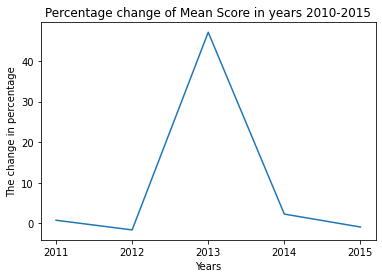

In [ ]:
plt.plot(change_meanscore_perct_change)
plt.rcParams['figure.figsize']=(20,10)
plt.xlabel('Years')
plt.ylabel('The change in percentage')
plt.title('Percentage change of Mean Score in years 2010-2015')
x=[2011,2012,2013,2014,2015]
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.show()

## Hypothesis 2: Number of takers will increase by at least 15 percent per year : NO

In [ ]:
change_takers=merged_table4.groupby('year')['Number_Tested'].mean()
change_takers

year
2010     76.072105
2011     78.651681
2012     77.399846
2013    117.552309
2014    119.837422
2015    121.952109
Name: Number_Tested, dtype: float64

In [ ]:
change_takers_perct_change=[]
for a, b in zip(change_takers[::1], change_takers[1::1]):
    change_takers_perct_change.append(100 * (b - a) / a)
change_takers_perct_change

[3.3909609128769254,
 -1.591619161327323,
 51.87667061951349,
 1.9439116074779386,
 1.7646306750141256]

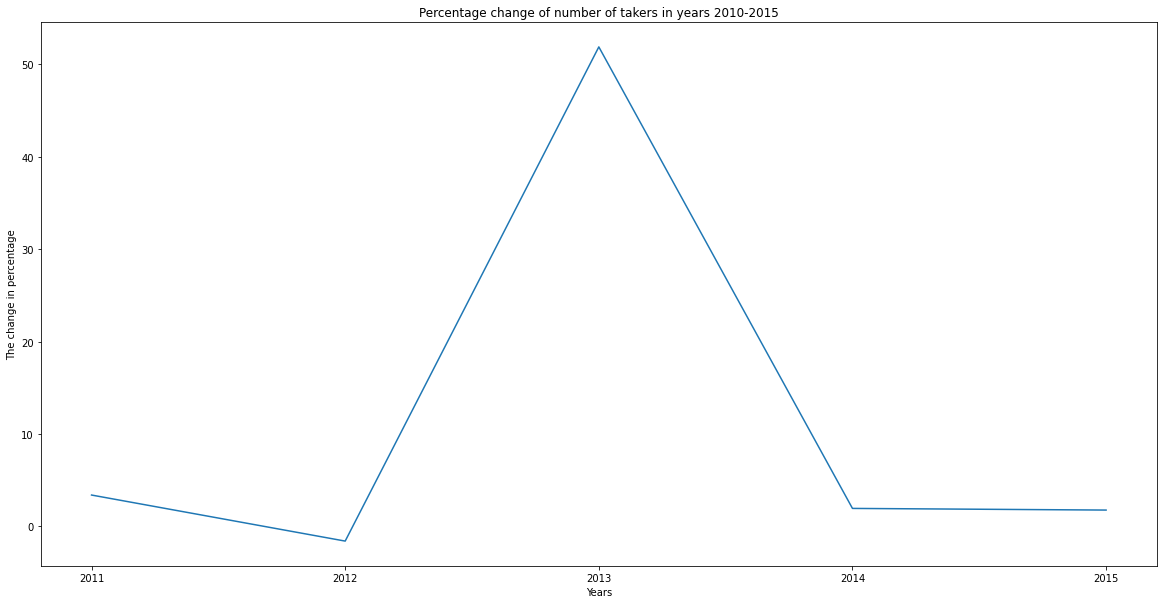

In [ ]:
plt.plot(change_takers_perct_change)
plt.rcParams['figure.figsize']=(20,10)
plt.xlabel('Years')
plt.ylabel('The change in percentage')
plt.title('Percentage change of number of takers in years 2010-2015')
x=[2011,2012,2013,2014,2015]
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.show()

##Questions to be answered:
Which county presented the largest change in the increase of takers?<br>
Which county has the largest change in the mean scores and are they same?

##Which county presented the largest change in the increase of takers?<br>Riverside

A dictionary is taken where the list of counties present were appended as keys in dictionary and the number of takers as the values for the keys. This dictionary contained multiple values mapped to one key. The multiple key values are added through iterating the groupby dataframe and accessing them. The groupby Dataframe has a series datatype 

In [ ]:
county_numbertested=merged_table4.groupby(['County_Name','year'])['Number_Tested'].sum()
list_of_county=merged_table4['County_Name'].unique()
dict_numbertested = {}
for i in list_of_county:
    dict_numbertested[i] = []
for i in county_numbertested.iteritems():
    dict_numbertested[i[0][0]].append(i[1])
dict_numbertested

{'Alameda': [8106, 8521, 8519, 8625, 8855, 8503],
 'Alpine': [0, 0],
 'Amador': [108, 95, 93, 97, 97, 88],
 'Butte': [725, 677, 668, 692, 636, 694],
 'Calaveras': [149, 142, 140, 147, 125, 130],
 'Colusa': [96, 98, 97, 87, 104, 109],
 'Contra Costa': [5765, 5850, 6088, 6869, 7027, 6865],
 'Del Norte': [97, 95, 57, 71, 81, 54],
 'El Dorado': [931, 1061, 974, 1041, 938, 950],
 'Fresno': [4603, 5095, 5240, 5543, 5907, 5992],
 'Glenn': [74, 94, 78, 109, 107, 108],
 'Humboldt': [463, 479, 444, 413, 469, 443],
 'Imperial': [638, 785, 840, 816, 898, 867],
 'Inyo': [93, 102, 88, 83, 87, 106],
 'Kern': [3597, 3874, 4110, 4076, 4300, 4353],
 'Kings': [512, 532, 572, 580, 586, 539],
 'Lake': [190, 191, 185, 175, 207, 180],
 'Lassen': [80, 81, 75, 85, 87, 83],
 'Los Angeles': [50677, 54557, 56566, 54787, 59663, 60396],
 'Madera': [483, 587, 606, 602, 782, 710],
 'Marin': [1223, 1250, 1345, 1319, 1233, 1167],
 'Mariposa': [60, 47, 31, 53, 39, 50],
 'Mendocino': [259, 288, 291, 273, 279, 320],
 'Mer

The percentage change is calculated by accessing the values from the dictionary. If the county has been zero then the exceptional math error is calculated.

In [ ]:
percent_change=[]
for key,value in dict_numbertested.items():
    try:
        percent_change.append(100*(dict_numbertested[key][-1]-dict_numbertested[key][0])/dict_numbertested[key][0])    
    except ZeroDivisionError:
        percent_change.append(0)        

maximum_percent=max(percent_change)
index_of_max=percent_change.index(maximum_percent)
print('The highest change in the number of takers through years is for the County '+list_of_county[index_of_max])

The highest change in the number of takers through years is for the County Riverside


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    y=list_of_county,
    x=percent_change,
    orientation='h',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 60, 19, 1.0)', width=3)
    )
))

fig.update_layout(
    title="Percentage change of exam takers",
    xaxis_title="Percentage",
    yaxis_title="Counties present",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="#7f7f7f"
    )
)

fig.show()

##Which county has the largest change in the mean scores and are they same?<br>Inyo.They are not same

In [ ]:
county_meanscores=merged_table4.groupby(['County_Name','year'])['Total_Mean'].mean()
dict_meanscores={}
for i in list_of_county:
    dict_meanscores[i] = []
for i in county_meanscores.iteritems():
    dict_meanscores[i[0][0]].append(i[1])

In [ ]:
percent_change1=[]
for key,value in dict_meanscores.items():
    try:
        percent_change1.append(100*(dict_meanscores[key][-1]-dict_meanscores[key][0])/dict_meanscores[key][0])    
    except ZeroDivisionError:
        percent_change1.append(0)        

maximum_percent1=max(percent_change1)
index_of_max1=percent_change1.index(maximum_percent1)
print('The highest change in the number of takers through years is for the County '+list_of_county[index_of_max1])

The highest change in the number of takers through years is for the County Inyo


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    y=list_of_county,
    x=percent_change1,
    orientation='h',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))

fig.update_layout(
    title="Percentage change of means scores",
    xaxis_title="Percentage",
    yaxis_title="Counties present",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="#7f7f7f"
    )
)

fig.show()

Riverside and Inyo. They are not same

#### What did I learn?
        1. Analysis of the data
        2. Handling missing values
        3. Accessing elements from a groupby dataframe
        4. Experimenting and finding various visualizations for the results